<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Короткий обзор базовых возможностей кастомных стилистик matplotlib

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cycler
import pandas as pd
import numpy as np

In [2]:
IPython_default = plt.rcParams.copy()

In [3]:
plt.rcParams.update(IPython_default)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
 

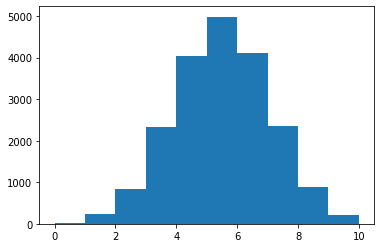

In [4]:
plt.hist(np.random.binomial(10,0.5, 20000))
plt.show()

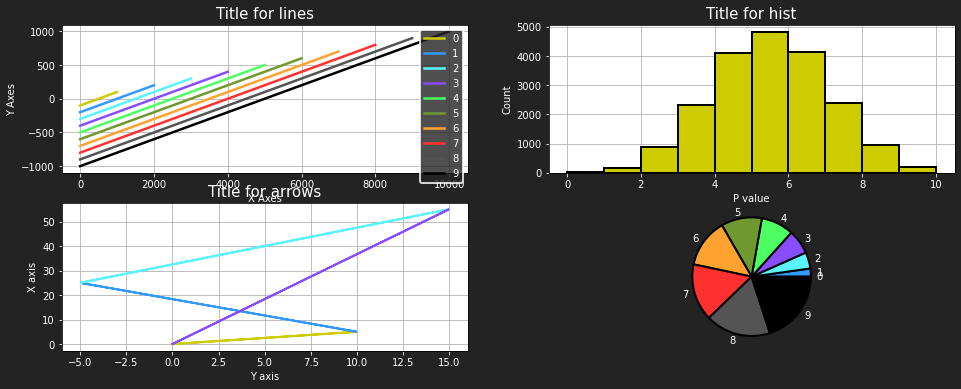

In [5]:
monokai_black = '#232323'
colors = cycler('color',
                ['#CCCC00','#3399FF','#59f4ff','#884dff', '#4dff62', 
                 '#6f992f', '#ffa230','#ff3030','#545454','#000000'])

plt.rc('axes', axisbelow=True, grid=True, titlesize=15,
       prop_cycle=colors, titlecolor='white', labelcolor='white')
plt.rc('figure', figsize=(16,6), facecolor='#232323')
plt.rc('xtick', direction='out', color='white')
plt.rc('ytick', direction='out', color='white')
plt.rc('legend', facecolor='#232323', edgecolor='white')
plt.rc('lines', linewidth=2.5)
plt.rc('patch', force_edgecolor=True, facecolor='#232323',
       edgecolor='black', lw=2)
plt.rc('text', color='white')




fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
for n in range(10):
    ax1.plot(np.linspace(-100*(n+1),100*(n+1),1000*(n+1)),label=n)
    ax1.legend()
ax1.set_title('Title for lines')
ax1.set_xlabel('X Axes')
ax1.set_ylabel('Y Axes')

ax2.hist(np.random.binomial(10,0.5, 20000)) 
ax2.set_title('Title for hist')
ax2.set_xlabel('P value')
ax2.set_ylabel('Count')


ax3.arrow(0,0,10,5, color=colors.by_key()['color'][0])
ax3.arrow(10,5,-15,20, color=colors.by_key()['color'][1])
ax3.arrow(-5,25,20,30, color=colors.by_key()['color'][2])
ax3.arrow(15,55,-15,-55, color=colors.by_key()['color'][3])
ax3.set_title('Title for arrows')
ax3.set_xlabel('Y axis')
ax3.set_ylabel('X axis')

ax4.pie(np.arange(10), labels=[i for i in range(10)])


plt.show()

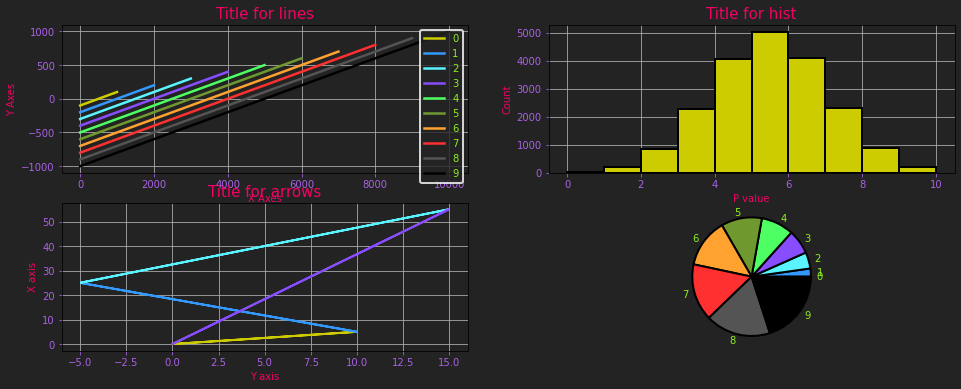

In [6]:
monokai_black = '#232323'
green = '#8eed20'
purple = '#aa61e5'
red = '#f30265'
colors = cycler('color',
                ['#CCCC00','#3399FF','#59f4ff','#884dff', '#4dff62', 
                 '#6f992f', '#ffa230','#ff3030','#545454','#000000'])

plt.rc('axes', axisbelow=True, grid=True, titlesize=15, facecolor='#232323',
       prop_cycle=colors, titlecolor='#f30265', labelcolor='#f30265')
plt.rc('figure', figsize=(16,6), facecolor='#232323')
plt.rc('xtick', direction='out', color='#aa61e5')
plt.rc('ytick', direction='out', color='#aa61e5')
plt.rc('legend', facecolor='#232323', edgecolor='white')
plt.rc('lines', linewidth=2.5)
plt.rc('patch', force_edgecolor=True, facecolor='#232323',
       edgecolor='black', lw=2)
plt.rc('text', color='#8eed20')




fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
for n in range(10):
    ax1.plot(np.linspace(-100*(n+1),100*(n+1),1000*(n+1)),label=n)
    ax1.legend()
ax1.set_title('Title for lines')
ax1.set_xlabel('X Axes')
ax1.set_ylabel('Y Axes')

ax2.hist(np.random.binomial(10,0.5, 20000)) 
ax2.set_title('Title for hist')
ax2.set_xlabel('P value')
ax2.set_ylabel('Count')


ax3.arrow(0,0,10,5, color=colors.by_key()['color'][0])
ax3.arrow(10,5,-15,20, color=colors.by_key()['color'][1])
ax3.arrow(-5,25,20,30, color=colors.by_key()['color'][2])
ax3.arrow(15,55,-15,-55, color=colors.by_key()['color'][3])
ax3.set_title('Title for arrows')
ax3.set_xlabel('Y axis')
ax3.set_ylabel('X axis')

ax4.pie(np.arange(10), labels=[i for i in range(10)])


plt.show()

In [7]:
data = pd.read_csv('datasets/melb_data.csv')
def currency(x, pos):
    'Two arguments - value and position of mark'
    if x >= 1000000:
        return '$ {:1.1f}M'.format(x*1e-6)
    return '$ {:1.0f}K'.format(x*1e-3)

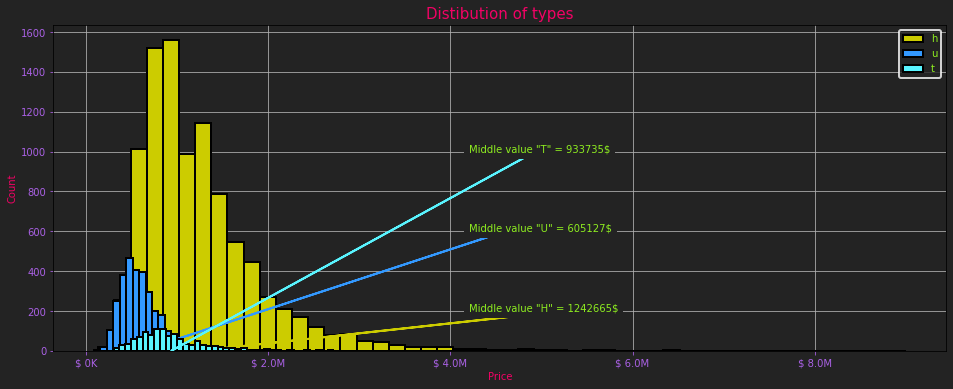

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))

types = []
b = 0
for j, i in enumerate(data.Type.unique()):

    d = data[data['Type'] == i]
    ax.hist(d.Price, bins=50,label=i)
    ax.arrow(d.Price.mean(), 0, 4000000, 200 + b, color=colors.by_key()['color'][j])
    ax.annotate('Middle value "{}" = {:1.0f}$'.format(str.upper(i), d.Price.mean()),
                [4200000, 200 + b],
                backgroundcolor='#232323',
                )

    b += 400

ax.set(title='Distibution of types', xlabel='Price', ylabel='Count')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend()
plt.show()

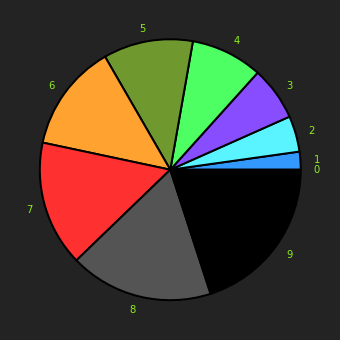

In [9]:
plt.pie(np.arange(10), labels=[i for i in range(10)])
plt.show()